In [1]:
#СОСНЮК КАТЕРИНА ФІТ 4-6 ВАРІАНТ 22
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

x_train original shape (50000, 32, 32, 3)
y_train original shape (50000, 1)


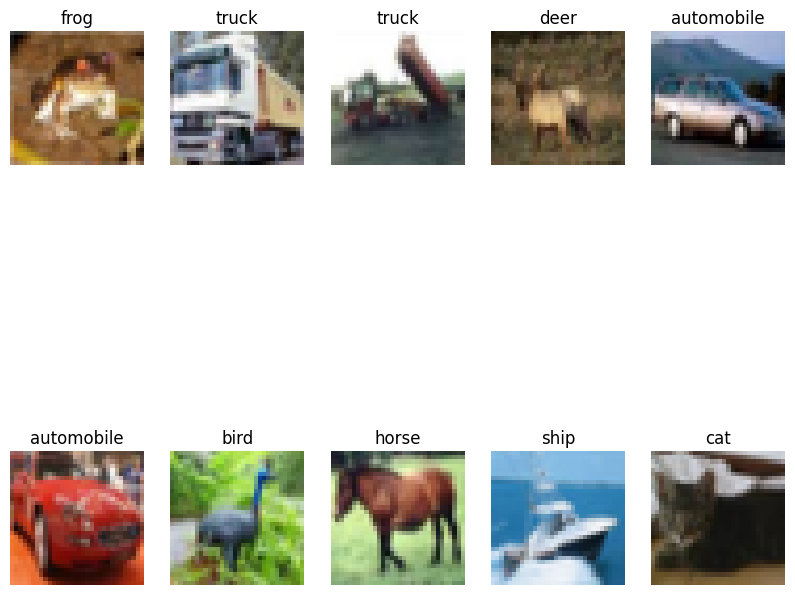

In [2]:
# Завантажити датасет cifar_10
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

print("x_train original shape", x_train.shape)
print("y_train original shape", y_train.shape)

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(classes[y_train[i, 0]])
    plt.axis('off')
plt.show()

In [3]:
#Розділити датасет cifar_10 на тренувальний та тестовий набори. 
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [7]:
# Створити нейронну мережу з використанням Keras з чотирма шарами (повністю з'єднані). 
# Встановити необхідну кількість вузлів на кожному шарі та використати підходящі функції активації. 
# Задати функцію втрат та оптимізатор для тренування. 
# Підберіть оптимальну кількість епох.

model = keras.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),  
    layers.Dense(512, activation="relu"),     
    layers.Dense(256, activation="relu"),     
    layers.Dense(128, activation="relu"),     
    layers.Dense(10, activation="softmax")    
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()

history = model.fit(x_train, y_train, epochs=15, batch_size=32, validation_split=0.2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_8 (Dense)             (None, 512)               1573376   
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
1250/1250 [======================

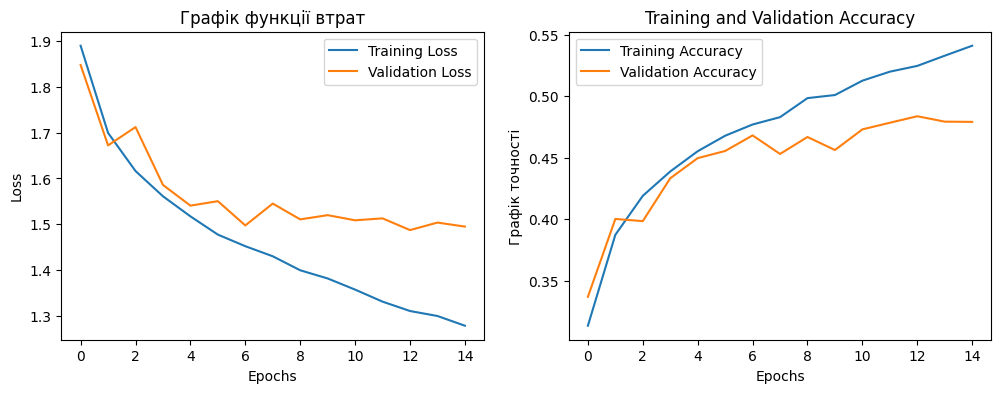

In [8]:
# Запустити тренування моделі на тренувальному наборі. 
# Вивести графіки функції втрат та точності відносно епох тренування. 
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Графік функції втрат')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Графік точності')
plt.legend()
plt.show()

313/313 - 1s - loss: 1.4719 - accuracy: 0.4875 - 1s/epoch - 4ms/step

Test Loss: 1.4719
Test Accuracy: 48.75%
1/1 [==============================] - 0s 16ms/step


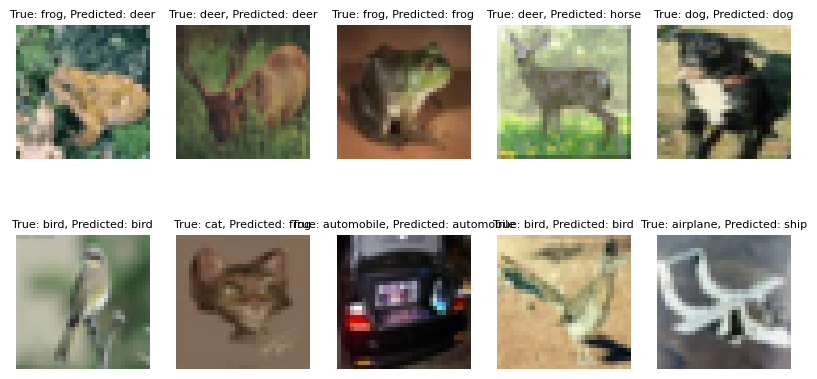

In [13]:
# Оцінити точність моделі на тестовому наборі. 
# Вибрати 10 випадкових зображень з тестового набору та використати навчену модель для їх класифікації. 
# Вивести спрогнозовані класи та порівняти їх із справжніми класами. 
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

random_indices = np.random.choice(x_test.shape[0], 10, replace=False)
random_images = x_test[random_indices]
predictions = model.predict(random_images)

plt.figure(figsize=(10, 5))
for i in range(10):
    predicted_class = np.argmax(predictions[i])
    true_class = np.argmax(y_test[random_indices[i]])

    plt.subplot(2, 5, i + 1)
    plt.imshow(random_images[i], cmap='gray')
    plt.title(f"True: {classes[true_class]}, Predicted: {classes[predicted_class]}", fontsize=8)
    plt.axis('off')
plt.show()


In [14]:
# Вивести статистику моделі 
print("\nModel Evaluation:")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
total_parameters = sum([np.prod(layer.get_weights()[i].shape) for layer in model.layers for i in range(len(layer.get_weights()))])
print(f"\nTotal Parameters: {total_parameters}")
for i, layer in enumerate(model.layers):
    print(f"\nLayer {i + 1}: {layer.name}")
    print(f"Number of Parameters: {layer.count_params()}")
    print(f"Input Shape: {layer.input_shape}, Output Shape: {layer.output_shape}")



Model Evaluation:
Test Loss: 1.4719
Test Accuracy: 48.75%

Total Parameters: 1738890

Layer 1: flatten_2
Number of Parameters: 0
Input Shape: (None, 32, 32, 3), Output Shape: (None, 3072)

Layer 2: dense_8
Number of Parameters: 1573376
Input Shape: (None, 3072), Output Shape: (None, 512)

Layer 3: dense_9
Number of Parameters: 131328
Input Shape: (None, 512), Output Shape: (None, 256)

Layer 4: dense_10
Number of Parameters: 32896
Input Shape: (None, 256), Output Shape: (None, 128)

Layer 5: dense_11
Number of Parameters: 1290
Input Shape: (None, 128), Output Shape: (None, 10)


In [ ]:
#ВИСНОВОК: можливість отримати високу точність без використання згорткових шарів обмежена, при тестуванні вдалося досягти точності 48.75%
#Оптимальна кількість епох, підібрана методом підбору - 15, якщо обрати більшу кількість починається плато у точності